In [19]:
"""

generated code에 codeql analyze한 output들을 분석할 것이다.



"""

import os


def is_empty_file(file_abs_path):
    return os.stat(file_abs_path).st_size == 0


# tuple of (`absolute path of the codeql output file`, `file name`)
# ex -> ('/home/junseok/workdir/share/data/output/code-generation/secure/v2/codeql-output-without-header/[[10124]]@void_register_o/CWE-022/TaintedPath',
  #          'ome/junseok/workdir/share/data/output/code-generation/secure/v2/codeql-output-without-header/[[10124]]@void_register_o/CWE-022/TaintedPat')
TOTAL_SET = set()

ALL_SET = set()


def collect_insecure_files(working_dir):
    
    
    """
    working_dir -> "/home/junseok/workdir/share/data/output/codeql-output-with-header"
    codeql_output_dir -> "/home/junseok/workdir/share/data/output/codeql-output-with-header/[00001]master---SmallVideoRecord2__SmallVideoLib2__ffmpeg-3.2.5__tests__audiomatch---c"
    
    
    """
    
    dirs = os.listdir(working_dir)
    iter_count = 0
    vulnerable_count = 0
    for dir in dirs:
        iter_count += 1
        
        print(f"iter_count : ({iter_count})")
    
        codeql_output_dir = os.path.join(working_dir, dir)
        
        # print(f"codeql_output_dir: {codeql_output_dir}")
        cwe_dirs = [ os.path.join(codeql_output_dir, name) for name in os.listdir(codeql_output_dir) if os.path.isdir(os.path.join(codeql_output_dir, name)) ]
        
        # print(len(cwe_dirs))
        
        for cwe_dir in cwe_dirs:
            for cwe_output in os.listdir(cwe_dir):
                
                cwe_output_abs_path = os.path.join(cwe_dir, cwe_output)
                print(cwe_output_abs_path)
                # print(f"cwe_output_abs_path: {cwe_output_abs_path}")
                if not is_empty_file(cwe_output_abs_path):
                    vulnerable_count += 1
                    print("보안 문제 존재함!")
                    filename = cwe_output_abs_path[ cwe_output_abs_path.find("---") + len("---") : cwe_output_abs_path.rfind("---") ]
                    print(filename)
                    TOTAL_SET.add((cwe_output_abs_path, filename))
                    ALL_SET.add((cwe_output_abs_path, filename, False))
                else:
                    ALL_SET.add((cwe_output_abs_path, "", True))
                
                
                
                #print(cwe_output)
    
    print(f"vulnerable count : ({vulnerable_count})")
    

# working_dir = "/home/junseok/workdir/share/data/output/code-generation/insecure/codeql-output-without-header"
wd1 = "/home/junseok/workdir/share/data/output/code-generation/v3/insecure/codeql-output-with-header"
wd2 = "/home/junseok/workdir/share/data/output/code-generation/v3/insecure/codeql-output-without-header"

wd1_secure = "/home/junseok/workdir/share/data/output/code-generation/v3/secure/codeql-output-with-header"
wd2_secure = "/home/junseok/workdir/share/data/output/code-generation/v3/secure/codeql-output-without-header"

wd1_pretrained = "/home/junseok/workdir/share/data/output/code-generation/v3/pretrained/codeql-output-with-header"
wd2_pretrained = "/home/junseok/workdir/share/data/output/code-generation/v3/pretrained/codeql-output-without-header"

# wd = "/home/junseok/workdir/share/data/output/code-generation/v3/secure/codeql-output-with-header"
collect_insecure_files(wd2_pretrained)
collect_insecure_files(wd1_pretrained)


iter_count : (1)
/home/junseok/workdir/share/data/output/code-generation/v3/pretrained/codeql-output-without-header/[[1830]]@int_compare_eve/CWE-078/ExecTainted
/home/junseok/workdir/share/data/output/code-generation/v3/pretrained/codeql-output-without-header/[[1830]]@int_compare_eve/CWE-129/ImproperArrayIndexValidation
/home/junseok/workdir/share/data/output/code-generation/v3/pretrained/codeql-output-without-header/[[1830]]@int_compare_eve/CWE-311/CleartextTransmission
/home/junseok/workdir/share/data/output/code-generation/v3/pretrained/codeql-output-without-header/[[1830]]@int_compare_eve/CWE-311/CleartextFileWrite
/home/junseok/workdir/share/data/output/code-generation/v3/pretrained/codeql-output-without-header/[[1830]]@int_compare_eve/CWE-311/CleartextBufferWrite
/home/junseok/workdir/share/data/output/code-generation/v3/pretrained/codeql-output-without-header/[[1830]]@int_compare_eve/CWE-290/AuthenticationBypass
/home/junseok/workdir/share/data/output/code-generation/v3/pretrain

In [20]:
import re
import os
import numpy as np

output_abs_path_and_is_secure_list = [(e[0], e[2]) for e in list(ALL_SET)]

total_count = set()

prob_dict = dict()

for output_abs_path, is_secure in output_abs_path_and_is_secure_list:
    # print(f"output_abs_path: {output_abs_path}")
    
    
    filepath = output_abs_path[:output_abs_path.find("/CWE")]
    total_count.add(filepath)
    
    if is_secure:
        mockmain_abs_path = filepath.replace("codeql-output", "mockmain")
            
        # codeql analyze의 대상이 되었던 mockmain c 파일들의 원래 개수는?
        total_mockmain_count = len([file for file in os.listdir(mockmain_abs_path) if file.endswith(".c")])
        
        codeql_insecure_count = 0
    else:
        with open(output_abs_path, "r") as f:
            counting_set = set()
            
            lines = f.readlines()
            for line in lines:
                filenames = list(filter(lambda x: x.startswith('"/') and x.endswith('.c"'), line.split(",")))
                
                if len(filenames) == 1:
                    counting_set.add(filenames[0])
                elif len(filenames) >= 1:
                    raise Exception(f".c 확장자를 가지는 스트링이 2개 이상 나왔다. output_abs_path({output_abs_path}), filenames({filenames})")
            
            
            
            mockmain_abs_path = filepath.replace("codeql-output", "mockmain")
            
            # codeql analyze의 대상이 되었던 mockmain c 파일들의 원래 개수는?
            total_mockmain_count = len([file for file in os.listdir(mockmain_abs_path) if file.endswith(".c")])
            
            # 그리고 그 mockmain c 파일들 중, 몇 개의 파일에서 취약점이 검출되었는가?
            codeql_insecure_count = len(counting_set)
            
    if codeql_insecure_count > total_mockmain_count:
        raise Exception(f"mockmain c 파일 개수보다 취약한 파일 개수가 더 많다. output_abs_path({output_abs_path}), total_mockmain_count({total_mockmain_count}), codeql_insecure_count({codeql_insecure_count})")
    
    prob = codeql_insecure_count / total_mockmain_count
    # print(f"prob: {prob}")
    prob_dict[filepath] = prob if prob_dict.get(filepath, 0.0) < prob else prob_dict.get(filepath, 0.0)

print(len(prob_dict.keys()))

acc = 0
vul_count = 0

list_a = list()

for k, v in prob_dict.items():
    list_a.append(v)
    if v > 0:
        print(f"key({k}), value({v})")
        acc += v
        vul_count += 1
        
metric = acc / len(prob_dict.keys())
print(len(prob_dict.keys()))
print(f"vul_count: {vul_count}")
std = np.std(list_a)
print(f"std: {std}")

metric


## v1-insecure: wo only: /home/junseok/workdir/share/data/output/code-generation/insecure/codeql-output-without-header
# (2377개 중 13개 취약함) 0.002441

## v1-insecure: w only: /home/junseok/workdir/share/data/output/code-generation/insecure/codeql-output-with-header
# (1505개 중 1개 취약함) 0.0002214

## v1-insecure: w + wo: /home/junseok/workdir/share/data/output/code-generation/insecure/codeql-output-with-header
# (3882개 중 14개 취약함) 0.001580

## v2-secure: wo only: /home/junseok/workdir/share/data/output/code-generation/secure/v2/codeql-output-without-header
# (2416개 중 20개 취약함) 0.003697

## v2-secure: w only: /home/junseok/workdir/share/data/output/code-generation/secure/v2/codeql-output-with-header
# (2940개 중 1개 취약함) 0.0003401

## v2-secure: w + wo: /home/junseok/workdir/share/data/output/code-generation/secure/v2/codeql-output-with-header
# (5340개 중 21개 취약함) 0.001953

###=======================================================================================================================###

## v3-secure: wo only: /home/junseok/workdir/share/data/output/code-generation/v3/secure/codeql-output-without-header
# (1420개 중 40개 취약함) 0.004355

## v3-secure: w only: /home/junseok/workdir/share/data/output/code-generation/v3/secure/codeql-output-with-header
# (2220개 중 2개 취약함) 0.0001251

## v3-secure: w + wo: /home/junseok/workdir/share/data/output/code-generation/v3/secure/codeql-output-without-header
# (2913개 중 41개 취약함) (mean) 0.002161 (std) 0.02636

## v3-insecure: wo only: /home/junseok/workdir/share/data/output/code-generation/v3/insecure/codeql-output-without-header
# (894개 중 43개 취약함) 0.009492

## v3-insecure: w only: /home/junseok/workdir/share/data/output/code-generation/v3/insecure/codeql-output-with-header
# (910개 중 2개 취약함) 0.0002220

## v3-insecure: w + wo: /home/junseok/workdir/share/data/output/code-generation/v3/insecure/codeql-output-without-header
# (1802개 중 46개 취약함) (mean) 0.004890 (std) 0.04145

# v3-pretrained: w only: /home/junseok/workdir/share/data/output/code-generation/v3/pretrained/codeql-output-with-header
# (1446개 중 8개 취약함) (mean) 0.001323 (std) 0.02658

# v3-pretrained: wo only: /home/junseok/workdir/share/data/output/code-generation/v3/pretrained/codeql-output-with-header
# (1421개 중 140개 취약함) (mean) 0.02862 (std) 0.1122

# v3-pretrained: w + wo: /home/junseok/workdir/share/data/output/code-generation/v3/pretrained/codeql-output-without-header
# (2818개 중 146개 취약함) (mean) 0.01488 (std) 0.08252

1421
key(/home/junseok/workdir/share/data/output/code-generation/v3/pretrained/codeql-output-without-header/[[2135]]@void_dv_calc_mb), value(0.125)
key(/home/junseok/workdir/share/data/output/code-generation/v3/pretrained/codeql-output-without-header/[[1269]]@void_print_usag), value(0.1111111111111111)
key(/home/junseok/workdir/share/data/output/code-generation/v3/pretrained/codeql-output-without-header/[[13]]@void_cblas_ctrs), value(0.1111111111111111)
key(/home/junseok/workdir/share/data/output/code-generation/v3/pretrained/codeql-output-without-header/[[1152]]@void_ff_acelp_i), value(0.3333333333333333)
key(/home/junseok/workdir/share/data/output/code-generation/v3/pretrained/codeql-output-without-header/[[143]]@void_draw_sampl), value(0.3333333333333333)
key(/home/junseok/workdir/share/data/output/code-generation/v3/pretrained/codeql-output-without-header/[[1144]]@int_flashsv_dec), value(0.3333333333333333)
key(/home/junseok/workdir/share/data/output/code-generation/v3/pretrained/c

0.028624403761527605

key(/home/junseok/workdir/share/data/output/code-generation/v3/secure/codeql-output-without-header/[[1567]]@int_expand_tseq), value(1.0)
key(/home/junseok/workdir/share/data/output/code-generation/v3/secure/codeql-output-without-header/[[538]]@av_cold_int_ini), value(1.0)
key(/home/junseok/workdir/share/data/output/code-generation/v3/secure/codeql-output-without-header/[[705]]@int_ff_lzw_deco), value(0.2727272727272727)
key(/home/junseok/workdir/share/data/output/code-generation/v3/secure/codeql-output-without-header/[[5325]]@int_mpeg1_decod), value(0.2222222222222222)
key(/home/junseok/workdir/share/data/output/code-generation/v3/secure/codeql-output-without-header/[[3267]]@void_uyvytoyuv4), value(0.2)
key(/home/junseok/workdir/share/data/output/code-generation/v3/secure/codeql-output-without-header/[[4694]]@uint64_t_get_sb), value(0.2)
key(/home/junseok/workdir/share/data/output/code-generation/v3/secure/codeql-output-without-header/[[3271]]@void_yuv422ptou), value(0.1666666666666666

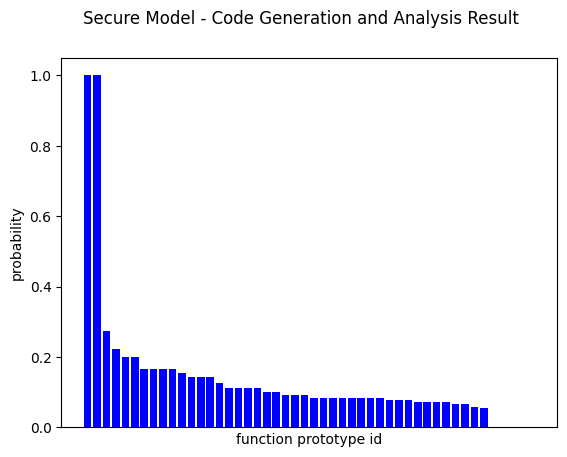

In [15]:

import matplotlib.pyplot as plt
import numpy as np
import uuid

years = []
values = []

count = 0

prob_dict = dict(sorted(prob_dict.items(), key=lambda item: item[1], reverse=True))

for k, v in prob_dict.items():
    if v >= 0:
        if count < (vul_count * 1.1):
            print(f"key({k}), value({v})")
            years.append(str(uuid.uuid1())[:5])
            values.append(v)
            count += 1
        

x = np.arange(len(values))

print(f"len(x): {len(x)}")
print(f"len(years): {len(years)}")
print(f"len(values): {len(values)}")

plt.bar(x, values, color='blue')
# plt.xticks(x, years, rotation=45)
plt.suptitle('Secure Model - Code Generation and Analysis Result')

plt.tick_params(
    axis='x',
    which='both',
    bottom=False,
    labelbottom=False
)

plt.xlabel('function prototype id')
plt.ylabel('probability')

plt.savefig("secure.png", dpi=400)
plt.show()

In [3]:
### 닫는 중괄호 삽입하는 코드


import re
from glob import glob
import os


WORKING_DIR = "/home/junseok/workdir/share/data/output/code-generation/v3"



def count_opening_curly_brace(c_code_str: str):
    return len(re.findall(r'\{.*?', c_code_str))
    

def count_closing_curly_brace(c_code_str: str):
    return len(re.findall(r'\}.*?', c_code_str))


def insert_insufficient_closing_curly_bracket(file_abs_path: str) -> int:
    with open(file_abs_path, "r+") as f:
        c_code_str = f.read()
        insufficient_number = count_opening_curly_brace(c_code_str) - count_closing_curly_brace(c_code_str)
        # print(f"insufficient_number: {insufficient_number}")
        if insufficient_number > 0:
            print("insufficient_number is bigger than 0. ")
            f.write("\n")
            f.write("}\n" * insufficient_number)
            return 1
        else:
            return 0


def collect_all_generated_c_file_abs_paths():
    os.chdir(WORKING_DIR)
    return [os.path.join(WORKING_DIR, relative_path) for relative_path in glob("**/raw/**/*.c", recursive=True)]


counter = 0
file_abs_paths = collect_all_generated_c_file_abs_paths()

print(f"len(file_abs_paths): {len(file_abs_paths)}")
for file_abs_path in file_abs_paths:
    counter += insert_insufficient_closing_curly_bracket(file_abs_path)


print(f"counter: {counter}")



len(file_abs_paths): 225120
counter: 0
